# IA pour recommandations de livres

### collection et analyse de donnes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv('data/Books.csv', sep=',', on_bad_lines='skip', encoding='latin-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_18312\121567600.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/Books.csv', sep=',', on_bad_lines='skip', encoding='latin-1')


In [5]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [7]:
books.shape

(271360, 8)

In [9]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [11]:
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [13]:
users = pd.read_csv('data/Users.csv', sep=",", on_bad_lines='skip', encoding='latin-1')

In [15]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
ratings = pd.read_csv('data/Ratings.csv', sep=",", on_bad_lines='skip', encoding='latin-1')

In [19]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [21]:
ratings.rename(columns={
    "User-ID": "user_id",
    "Book-Rating": "rating"}, inplace=True)

In [23]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 6)
(1149780, 3)
(278858, 3)


In [25]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [29]:
ratings['user_id'].unique().shape

(105283,)

In [31]:
usersThatReadMore = ratings['user_id'].value_counts() > 100

In [33]:
usersThatReadMore[usersThatReadMore].shape

(1825,)

In [35]:
# the users index
userToMatch = usersThatReadMore[usersThatReadMore].index

In [39]:
# to save  those and only those users
ratings = ratings[ratings['user_id'].isin(userToMatch)]

In [41]:
ratings.head()

,user_id,ISBN,rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0


In [43]:
ratings.shape

(656605, 3)

In [46]:
# jointure de tableau ratings avec books
ratings_avec_books = ratings.merge(books,on="ISBN")

In [53]:
ratings_avec_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...


In [50]:
ratings_avec_books.shape

(604854, 8)

In [63]:
# the ratings signifie number the number the book was ratted
num_of_ratings = ratings_avec_books.groupby('title')['rating'].count().reset_index()

In [65]:
# to make the previous table clear we will be changing the name of the column rating
num_of_ratings.rename(columns={'rating':'howManyTimesRated'}, inplace=True)

In [67]:
num_of_ratings.head()

,title,howManyTimesRated
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [69]:
# now we will be merging the two tables to have clear idea on each book and how many times rated
ratingsGeneralInfo = ratings_avec_books.merge(num_of_ratings, on='title')

In [71]:
ratingsGeneralInfo.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,howManyTimesRated
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
1,276925,0060520507,0,"Sushi for Beginners : A Novel (Keyes, Marian)",Marian Keyes,2003,William Morrow,http://images.amazon.com/images/P/0060520507.0...,16
2,276925,0060930934,0,Wasted : A Memoir of Anorexia and Bulimia,Marya Hornbacher,1999,Perennial,http://images.amazon.com/images/P/0060930934.0...,12
3,276925,0060951303,0,La casa de los espÃÂ­ritus,Isabel Allende,1995,Rayo,http://images.amazon.com/images/P/0060951303.0...,8
4,276925,0140154078,6,The Music of Chance,Paul Auster,1993,Penguin Books,http://images.amazon.com/images/P/0140154078.0...,6


In [73]:
    ratingsGeneralInfo.shape

(604854, 9)

In [76]:
# to make our rating accurate we will be taking the books with ratingTimes more than 50
ratingsGeneralInfo = ratingsGeneralInfo[ratingsGeneralInfo['howManyTimesRated'] >= 50]

In [78]:
ratingsGeneralInfo.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,howManyTimesRated
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,105
5,276925,0140327592,0,Matilda,Roald Dahl,1990,Viking Penguin Inc,http://images.amazon.com/images/P/0140327592.0...,79
12,276925,0316666343,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,430
15,276925,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,335
37,276925,0804106304,0,The Joy Luck Club,Amy Tan,1994,Prentice Hall (K-12),http://images.amazon.com/images/P/0804106304.0...,263


In [80]:
ratingsGeneralInfo.shape

(100426, 9)

In [84]:
# to avoid duplicates
ratingsGeneralInfo = ratingsGeneralInfo.copy()
ratingsGeneralInfo.drop_duplicates(['user_id','title'],inplace=True)

In [86]:
ratingsGeneralInfo.shape

(97962, 9)

In [88]:
# the pivot_table transform the data frame into a matrice
book_pivot = ratingsGeneralInfo.pivot_table(index='title', columns='user_id', values='rating')

In [90]:
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
book_pivot.shape

(1094, 1794)

In [94]:
book_pivot.fillna(0, inplace=True)

In [96]:
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### entrainement du modele

In [101]:
from scipy.sparse import csr_matrix

In [103]:
#We convert book_pivot (which stores books as rows and users as columns) 
#into a Compressed Sparse Row (CSR) matrix to optimize memory and speed.
book_sparse = csr_matrix(book_pivot)

In [105]:
type(book_sparse)

scipy.sparse._csr.csr_matrix

#### We train k-NN using user-book ratings.
brute → A method that compares every book with every other book to find the most similar ones.

In [113]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [115]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

Finding Similar Books

We take book 237 (random book) and ask:
"Which 6 books are most similar to this?"
kneighbors() returns:
distance → How different each book is from book 237.
suggestion → The index numbers of the 6 most similar books.

In [168]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1),n_neighbors=10)

<b>Heatmap of Similarities</b>

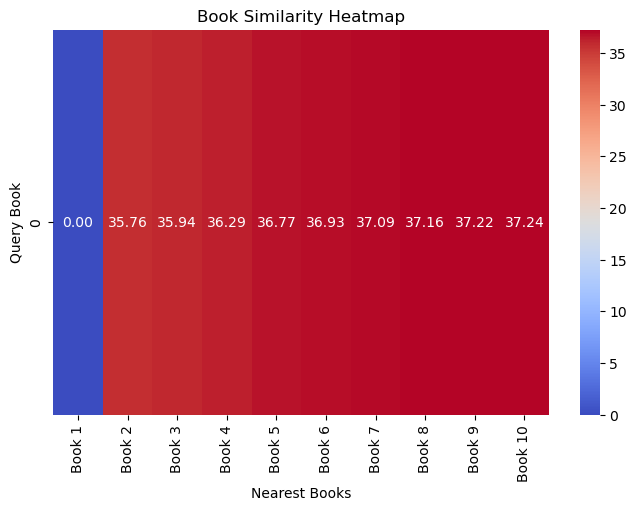

In [180]:
df_similarity = pd.DataFrame(distance, columns=[f"Book {i+1}" for i in range(distance.shape[1])])
plt.figure(figsize=(8, 5))
sns.heatmap(df_similarity, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Book Similarity Heatmap")
plt.xlabel("Nearest Books")
plt.ylabel("Query Book")
plt.show()

<b>Scatter Plot of Book Distances</b>

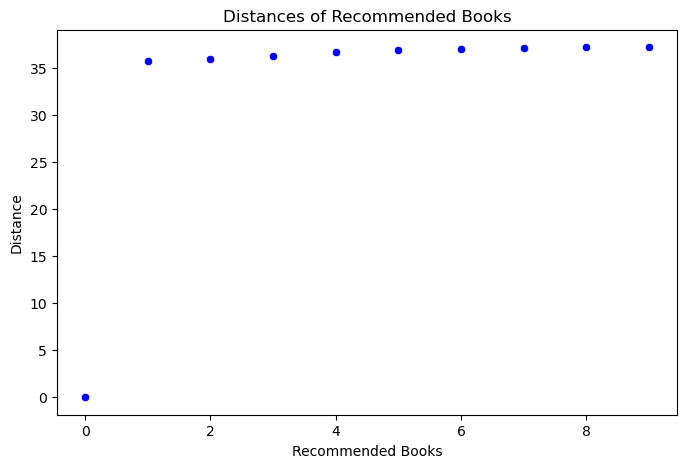

In [183]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=range(len(distance[0])), y=distance[0], marker="o", color="b")
plt.title("Distances of Recommended Books")
plt.xlabel("Recommended Books")
plt.ylabel("Distance")
plt.show()


<b>Bar Plot of Top Recommended Books</b>

C:\Users\HP\AppData\Local\Temp\ipykernel_18312\2533323126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance[0], y=recommended_books, palette="Blues_r")


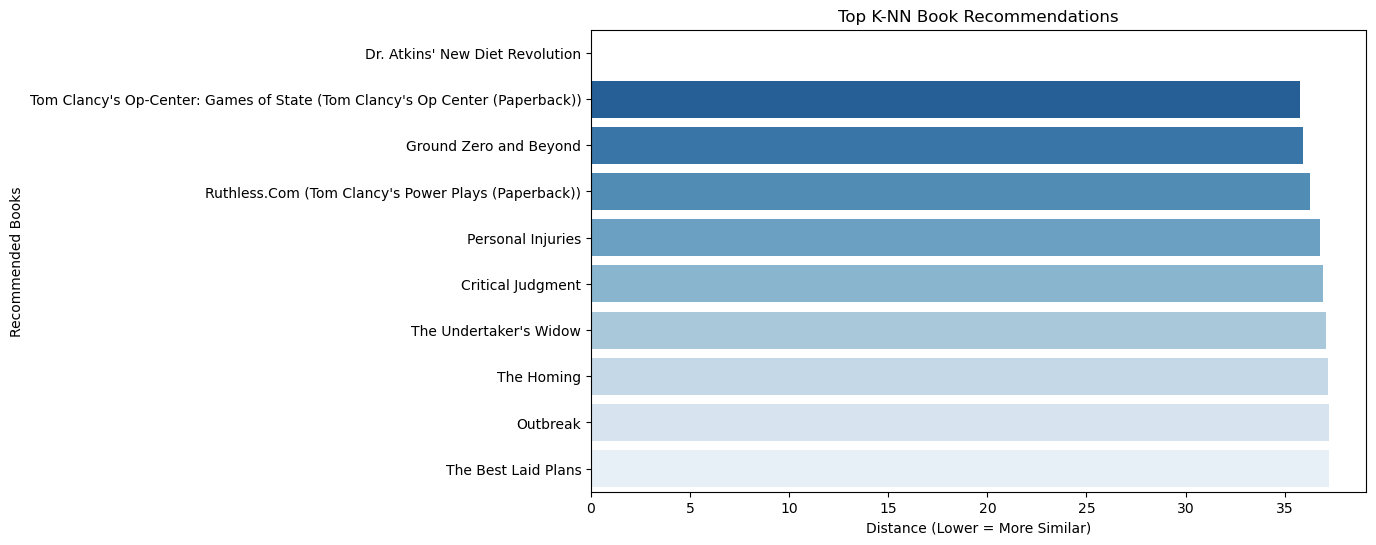

In [186]:
recommended_books = [book_pivot.index[i] for i in suggestion[0]]

plt.figure(figsize=(10,6))
sns.barplot(x=distance[0], y=recommended_books, palette="Blues_r")
plt.xlabel("Distance (Lower = More Similar)")
plt.ylabel("Recommended Books")
plt.title("Top K-NN Book Recommendations")
plt.show()


In [170]:
distance

array([[ 0.        , 35.76310948, 35.94440151, 36.29049462, 36.76955262,
        36.93237063, 37.09447398, 37.16180835, 37.21558813, 37.2424489 ]])

In [172]:
suggestion

array([[ 237, 1020,  335,  620,  561,  193,  984,  852,  550,  746]],
      dtype=int64)

In [174]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Dr. Atkins' New Diet Revolution',
       'Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))',
       'Ground Zero and Beyond',
       'Ruthless.Com (Tom Clancy's Power Plays (Paperback))',
       'Personal Injuries', 'Critical Judgment', 'The Undertaker's Widow',
       'The Homing', 'Outbreak', 'The Best Laid Plans'],
      dtype='object', name='title')


In [176]:
book_pivot.index[5]

'2nd Chance'

### saving the books names

In [142]:
book_pivot

user_id,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
book_names = book_pivot.index

In [135]:
book_names[10]

'A Bend in the Road'

the purpose of the [0][0] is to extract the name only

In [139]:
# to search the book by name
np.where(book_pivot.index == 'Exclusive')[0][0]

268

In [146]:
import pickle
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/book_names.pkl', 'wb'))
pickle.dump(ratingsGeneralInfo, open('artifacts/ratingsGeneralInfo.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

In [148]:
def recommend_books(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [164]:
book_name = "1st to Die: A Novel"
recommend_books(book_name)

You searched '1st to Die: A Novel'

The suggestion books are: 

Silent Night : A Christmas Suspense Story
The Vendetta Defense
The Klone and I: A High-Tech Love Story
Left Behind: A Novel of the Earth's Last Days (Left Behind #1)
Border Music
